<a href="https://colab.research.google.com/github/chamonregina/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/STRETCH_GOALS_FOR_DS_11_UNIT_1_SPRINT_1_(EXPLORATORY_DATA_ANALYSIS)_REGINA_CHATMON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

- Practice Exploring other Datasets
- Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:[Seaborn Pairplot](https://)


- Turn some of the continuous variables into categorical variables by binning the values using:
pd.cut()
pd.qcut()
https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
And then use crosstabs to compare/visualize these binned variables against the other variables.

- Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

Stretch goal - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

In [107]:
from google.colab import files
upload = files.upload()

Saving iris.data to iris (5).data


In [108]:
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [0]:
df.rename(columns={'5.1': 'Sepal_length', '3.5':'Sepal_width', '1.4':'Petal_length', '0.2': 'Petal_width', 'Iris-setosa':'species'}, inplace = True)

In [110]:
df.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'species'],
      dtype='object')

In [111]:
print(df.shape)
df.head()

(149, 5)


,Sepal_length,Sepal_width,Petal_length,Petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [112]:
df.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,species
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [113]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [127]:
####petal_width data is divided into 4 equal-sized bins based on above percentiles.
pd.qcut(df['Petal_length'], 4)

0      (0.999, 1.6]
1      (0.999, 1.6]
2      (0.999, 1.6]
3      (0.999, 1.6]
4        (1.6, 4.4]
           ...     
144      (5.1, 6.9]
145      (4.4, 5.1]
146      (5.1, 6.9]
147      (5.1, 6.9]
148      (4.4, 5.1]
Name: Petal_length, Length: 149, dtype: category
Categories (4, interval[float64]): [(0.999, 1.6] < (1.6, 4.4] < (4.4, 5.1] < (5.1, 6.9]]

In [134]:

df['Quantile_Rank'] = pd.qcut(df['Petal_length'], q=4)
df.head()


,Sepal_length,Sepal_width,Petal_length,Petal_width,species,quan_rank,petal_length,Quantile_Rank
0,4.9,3.0,1.4,0.2,Iris-setosa,0,<function qcut at 0x7f42c1bef730>,"(0.999, 1.6]"
1,4.7,3.2,1.3,0.2,Iris-setosa,0,<function qcut at 0x7f42c1bef730>,"(0.999, 1.6]"
2,4.6,3.1,1.5,0.2,Iris-setosa,0,<function qcut at 0x7f42c1bef730>,"(0.999, 1.6]"
3,5.0,3.6,1.4,0.2,Iris-setosa,0,<function qcut at 0x7f42c1bef730>,"(0.999, 1.6]"
4,5.4,3.9,1.7,0.4,Iris-setosa,1,<function qcut at 0x7f42c1bef730>,"(1.6, 4.4]"


In [137]:
pd.crosstab(df.Quantile_Rank, df.species)

species,Iris-setosa,Iris-versicolor,Iris-virginica
Quantile_Rank,,,
"(0.999, 1.6]",43,0,0
"(1.6, 4.4]",6,29,0
"(4.4, 5.1]",0,21,16
"(5.1, 6.9]",0,0,34


In [138]:
pd.crosstab(df.Quantile_Rank, df.Sepal_length)

Sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
Quantile_Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0.999, 1.6]",1,3,1,4,2,4,4,8,5,3,1,3,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(1.6, 4.4]",0,0,0,0,0,1,1,2,3,1,0,2,5,4,5,3,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
"(4.4, 5.1]",0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,3,2,5,4,2,5,1,2,1,2,1,2,1,0,0,0,0,0,0,0
"(5.1, 6.9]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,5,3,0,5,2,2,0,1,3,1,1,1,4,1


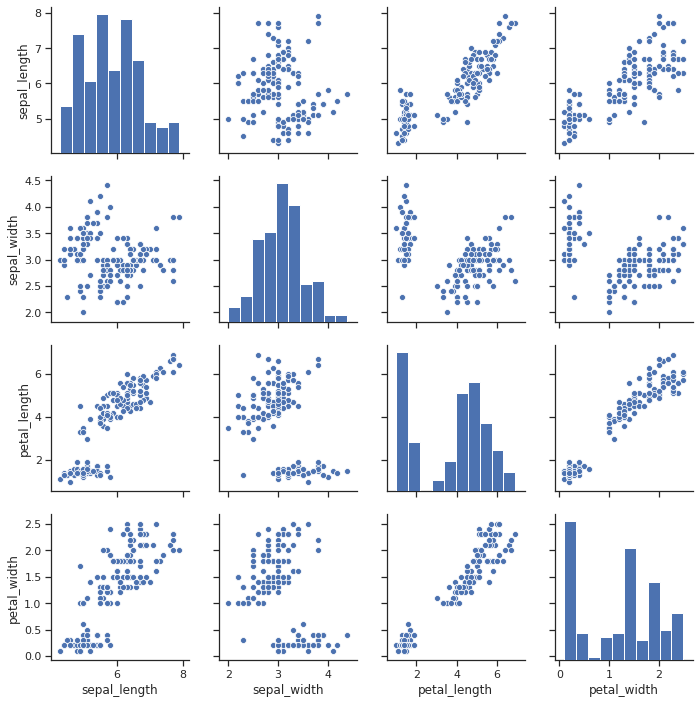

In [0]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)


df = sns.load_dataset("iris")
sns.pairplot(df);

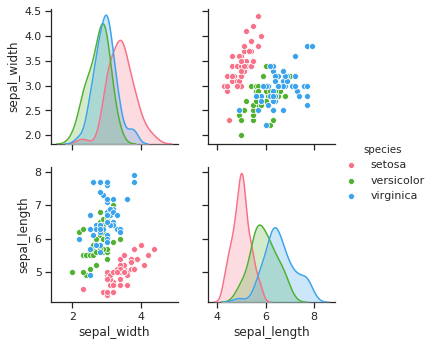

In [0]:
 df = sns.pairplot(df, vars=["sepal_width", "sepal_length"], hue='species', palette='husl')